<a href="https://colab.research.google.com/github/ChiomaOfunwa/BlossomBank/blob/main/Blossom_Bank_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pwd()

'/content'

Machine Learning Model that perdicts online payment fraud. This will help blossom bank to detect online payment fraud. Hence, enhancing customers transactions security.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
FD= pd.read_csv('/content/Online Payment Fraud Detection (1).csv')
FD.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [ ]:
FD.shape

(1048575, 10)

In [ ]:
FD.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [ ]:
FD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [ ]:
FD.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [ ]:
FD.duplicated().sum()

0

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


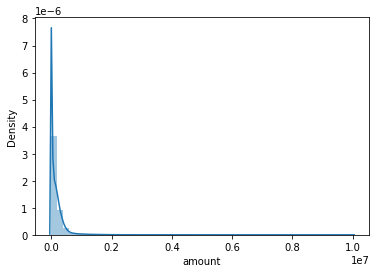

In [ ]:
sns.distplot(FD.amount);

In [ ]:
FD.amount.skew()


6.374165698763262

The amount is right skewed i.e Positively skewed

In [ ]:
FD.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,-0.025996,-0.006780,-0.007180,-0.002251,-0.019503,0.045030
amount,-0.025996,1.000000,0.004864,-0.001133,0.215558,0.311936,0.128862
oldbalanceOrg,-0.006780,0.004864,1.000000,0.999047,0.093305,0.064049,0.003829
newbalanceOrig,-0.007180,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.009438
oldbalanceDest,-0.002251,0.215558,0.093305,0.095182,1.000000,0.978403,-0.007552
newbalanceDest,-0.019503,0.311936,0.064049,0.063725,0.978403,1.000000,-0.000495
isFraud,0.045030,0.128862,0.003829,-0.009438,-0.007552,-0.000495,1.000000


Univariate Analysis

In [ ]:
def fraud(x):
  if x==1:
    return 'Fraud'
  else:
    return 'Valid'

FD['IsFraud'] = FD['isFraud'].apply(fraud)
FD.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,IsFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,Valid
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,Valid
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,Fraud
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,Valid


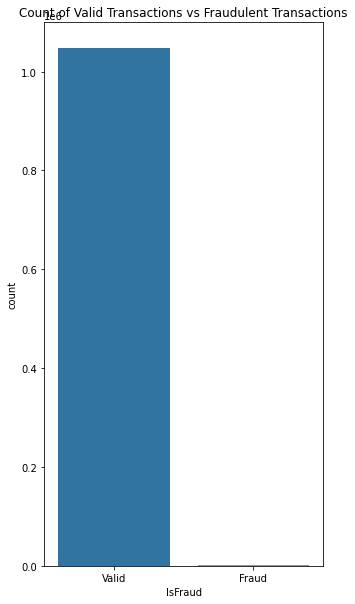

In [ ]:
plt.figure(figsize= (5,10))
plt.title('Count of Valid Transactions vs Fraudulent Transactions')
sns.countplot(data=FD, x='IsFraud')
plt.show();

Number of Fraud detected on Blossom Bank's customer transaction.

In [ ]:
FD['IsFraud'].value_counts()

Valid    1047433
Fraud       1142
Name: IsFraud, dtype: int64

Percentage of Fraud transactions.

In [ ]:
fraud_percentage= (FD['IsFraud'].value_counts()/FD.shape[0]*100).round(2)
fraud_percentage

Valid    99.89
Fraud     0.11
Name: IsFraud, dtype: float64

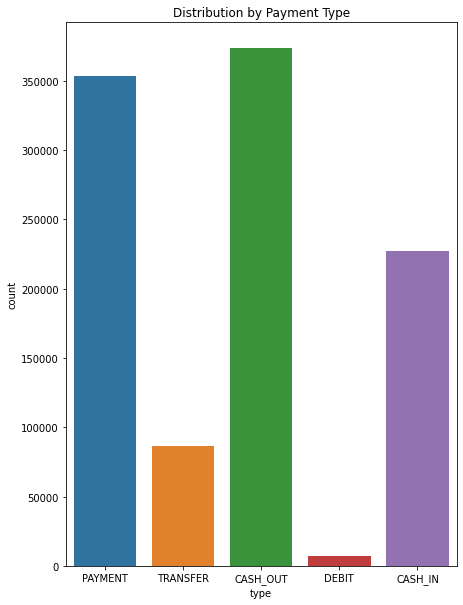

In [ ]:
plt.figure(figsize= (7,10))
plt.title('Distribution by Payment Type')
sns.countplot(data=FD, x='type')
plt.show()

In [ ]:
FD.type.value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

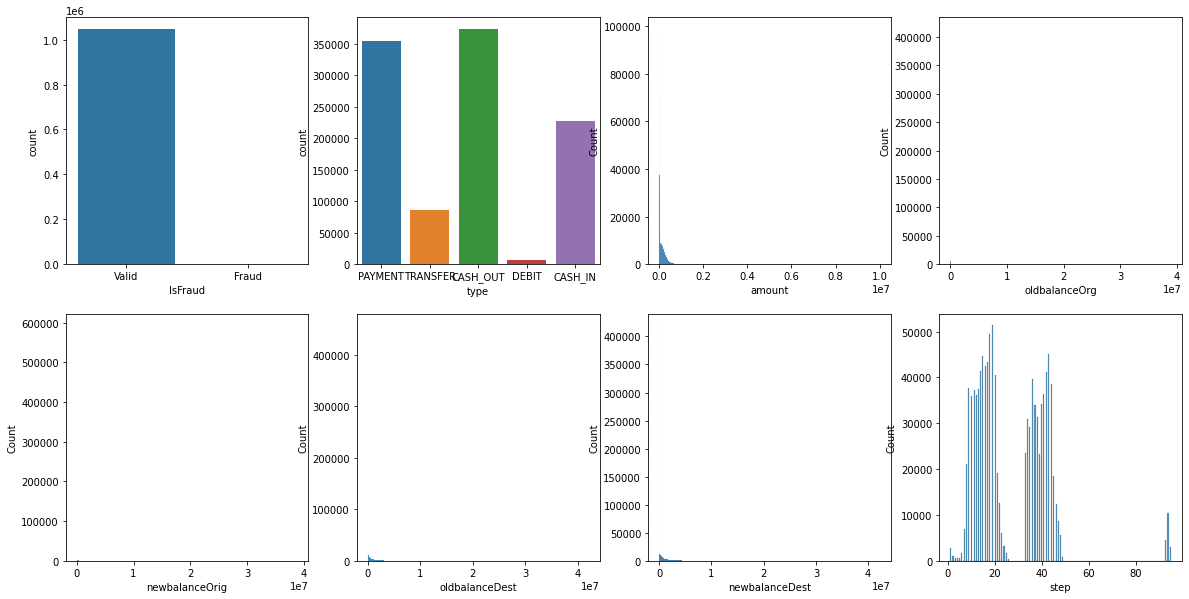

In [ ]:
fig,axes = plt.subplots(2,4, figsize=(20,10))
sns.countplot(x='IsFraud', data=FD, ax= axes[0,0])
sns.countplot(x='type', data=FD, ax= axes[0,1])
sns.histplot(x='amount', data=FD, ax= axes[0,2])
sns.histplot(x='oldbalanceOrg', data=FD, ax= axes[0,3])
sns.histplot(x='newbalanceOrig', data=FD, ax= axes[1,0])
sns.histplot(x='oldbalanceDest', data=FD, ax= axes[1,1])
sns.histplot(x='newbalanceDest', data=FD, ax= axes[1,2])
sns.histplot(x='step', data=FD, ax= axes[1,3])


Mutivariate Analysis

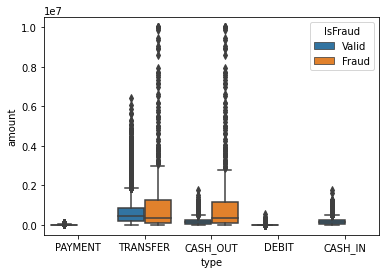

In [ ]:
sns.boxplot(x='type', y='amount', hue='IsFraud', data=FD)

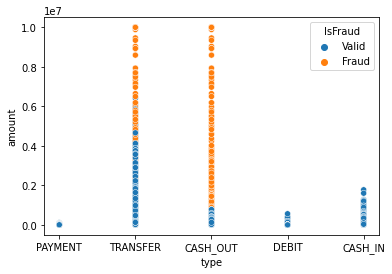

In [ ]:
sns.scatterplot(x='type', y='amount', hue='IsFraud', data=FD)

The transfer payment type and the cash out are the avenue through which the farud are mostly carried out as observed from the chart.

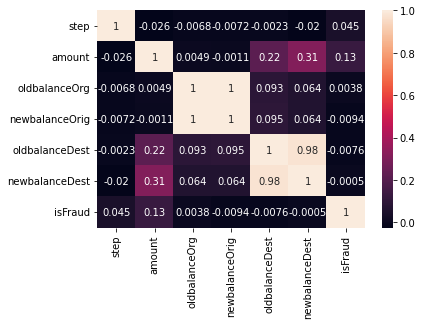

In [ ]:
corel= FD.corr()
sns.heatmap(corel, annot= True)

From the above visiualization, The best correlation is between newbalanceOrig and OldbalanceOrg, Followed by 
oldbalanceDest and newbalanceDest with a positive correlation.

DATA PREPROCESSING

In [ ]:
FD.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'IsFraud'],
      dtype='object')

In [ ]:
IsFraud= FD.drop('isFraud', axis= 1, inplace= True)

In [ ]:
FD.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9839.64,170136.0,160296.36,0.0,0.0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0
2,1,4,181.00,181.0,0.00,0.0,0.0
3,1,1,181.00,181.0,0.00,21182.0,0.0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
FD['IsFraud']= le.fit_transform(FD['IsFraud'])


In [ ]:
target= FD['IsFraud']
FD = FD.drop(columns= ['IsFraud','nameOrig', 'nameDest'], axis= 1)

In [ ]:
target

0          1
1          1
2          0
3          0
4          1
          ..
1048570    1
1048571    1
1048572    1
1048573    1
1048574    1
Name: IsFraud, Length: 1048575, dtype: int64

In [ ]:
le= LabelEncoder()
FD['type']= le.fit_transform(FD['type'])

In [ ]:
FD.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9839.64,170136.0,160296.36,0.0,0.0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0
2,1,4,181.00,181.0,0.00,0.0,0.0
3,1,1,181.00,181.0,0.00,21182.0,0.0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
FD= scaler.fit_transform(FD)

In [ ]:
FD

array([[-1.6620219 ,  0.9565757 , -0.56173807, ..., -0.24383202,
        -0.42588334, -0.46106169],
       [-1.6620219 ,  0.9565757 , -0.59184049, ..., -0.29067345,
        -0.42588334, -0.46106169],
       [-1.6620219 ,  1.70006662, -0.59819391, ..., -0.29711726,
        -0.42588334, -0.46106169],
       ...,
       [ 4.35465419,  0.9565757 , -0.54550648, ..., -0.29498814,
        -0.42588334, -0.46106169],
       [ 4.35465419,  0.9565757 , -0.56105712, ..., -0.27032945,
        -0.42588334, -0.46106169],
       [ 4.35465419,  0.9565757 , -0.55565977, ..., -0.27413563,
        -0.42588334, -0.46106169]])

DATA MODELING

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(FD, target, test_size= 0.3, random_state= 0)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(734002, 7)
(314573, 7)


Using Naive Bayes Model Algorithm as it is a Supervised Learning Classifier.

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb= GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
nb_pred= nb.predict(x_test)
nb_pred

array([1, 0, 1, ..., 1, 1, 1])

MODEL EVALUATION OF NAIVE BAYES ALGORITHM

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
NB_Score = roc_auc_score(y_test,nb_pred)

In [ ]:
NB_Score

0.6716055095319352

USING LOGISTIC REGRESSION ALGORITHM

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR= LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [ ]:
LR_pred = LR.predict(x_test)
LR_pred

array([1, 1, 1, ..., 1, 1, 1])

MODEL EVALUATION USING LOGISTIC REGRESSION ALGORITHM

In [ ]:
LR_Score= roc_auc_score(y_test,LR_pred)

In [ ]:
LR_Score

0.6486391018054716

USING DECISION TREE ALGORITHM

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT= DecisionTreeClassifier()
DT.fit(x_train,y_train)


DecisionTreeClassifier()

In [ ]:
DT_pred = DT.predict(x_test)
DT_pred

array([1, 1, 1, ..., 1, 1, 1])

MODEL EVALUATION USING DECISION TREE ALGORITHM

In [ ]:
DT_Score= roc_auc_score(y_test, DT_pred)

In [ ]:
DT_Score

0.9113095784175214

Based on the Model built to train, test, predict and evaluate the data set. The Decision Tree Algorithm proves to be the most accurate with a 91% accuracy. 